# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1381]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [1382]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [1383]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4          NaN            Student                198.0            1.0   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

In [1384]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [1385]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include="all")

TransactionID AccountID  TransactionAmount      TransactionDate  \
count           2508      2516        2511.000000                 2509   
unique          2484       495                NaN                 2485   
top         TX001748   AC00362                NaN  2023-10-20 17:53:13   
freq               2        12                NaN                    2   
mean             NaN       NaN         297.656468                  NaN   
std              NaN       NaN         292.230367                  NaN   
min              NaN       NaN           0.260000                  NaN   
25%              NaN       NaN          81.310000                  NaN   
50%              NaN       NaN         211.360000                  NaN   
75%              NaN       NaN         413.105000                  NaN   
max              NaN       NaN        1919.110000                  NaN   

       TransactionType    Location DeviceID      IP Address MerchantID  \
count             2507        2507     2507            2517       2514   
unique               2          43      681             591        100   
top              Debit  Fort Worth  D000573  200.136.146.93       M026   
freq              1942          71        9              12         46   
mean               NaN         NaN      NaN             NaN        NaN   
std                NaN         NaN      NaN             NaN        NaN   
min                NaN         NaN      NaN             NaN        NaN   
25%                NaN         NaN      NaN             NaN        NaN   
50%                NaN         NaN      NaN             NaN        NaN   
75%                NaN         NaN      NaN             NaN        NaN   
max                NaN         NaN      NaN             NaN        NaN   

       Channel  CustomerAge CustomerOccupation  TransactionDuration  \
count     2510  2519.000000               2514          2511.000000   
unique       3          NaN                  4                  NaN   
top     Branch          NaN            Student                  NaN   
freq       868          NaN                657                  NaN   
mean       NaN    44.678444                NaN           119.422939   
std        NaN    17.837359                NaN            70.078513   
min        NaN    18.000000                NaN            10.000000   
25%        NaN    27.000000                NaN            63.000000   
50%        NaN    45.000000                NaN           112.000000   
75%        NaN    59.000000                NaN           161.000000   
max        NaN    80.000000                NaN           300.000000   

        LoginAttempts  AccountBalance PreviousTransactionDate  
count     2516.000000     2510.000000                    2513  
unique            NaN             NaN                     360  
top               NaN             NaN     2024-11-04 08:09:17  
freq              NaN             NaN                      18  
mean         1.121622     5113.438124                     NaN  
std          0.594469     3897.975861                     NaN  
min          1.000000      101.250000                     NaN  
25%          1.000000     1504.727500                     NaN  
50%          1.000000     4734.110000                     NaN  
75%          1.000000     7672.687500                     NaN  
max          5.000000    14977.990000                     NaN

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

In [1386]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
df.corr(numeric_only=True)

TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.024428             0.004782   
CustomerAge                  -0.024428     1.000000            -0.009852   
TransactionDuration           0.004782    -0.009852             1.000000   
LoginAttempts                -0.007397     0.007876             0.030076   
AccountBalance               -0.026310     0.321161             0.006859   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.007397       -0.026310  
CustomerAge               0.007876        0.321161  
TransactionDuration       0.030076        0.006859  
LoginAttempts             1.000000        0.009088  
AccountBalance            0.009088        1.000000

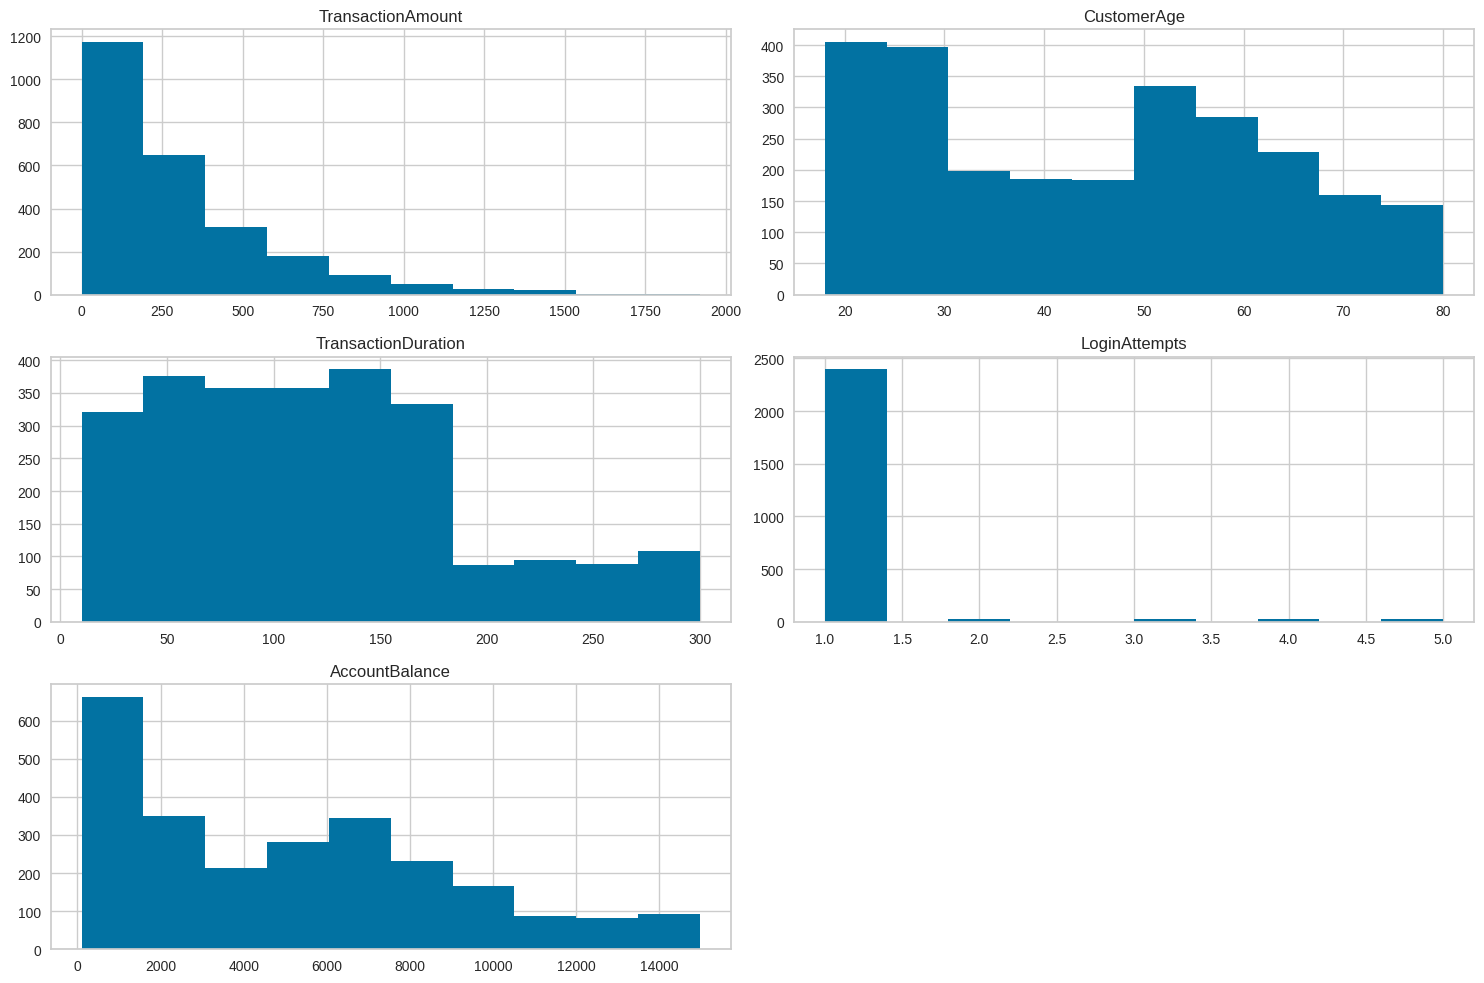

In [1387]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

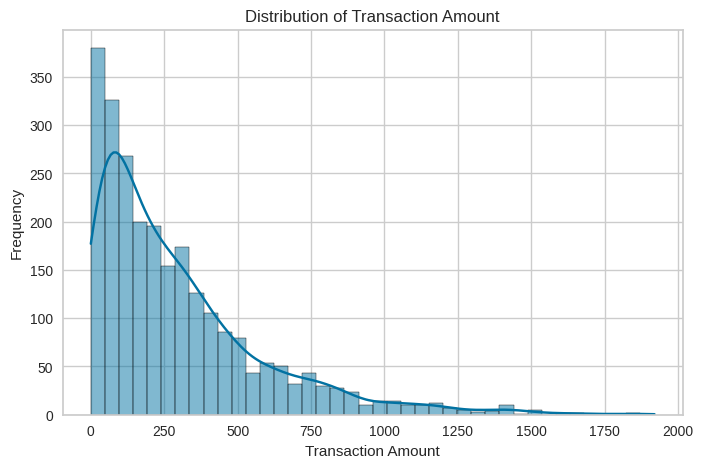

In [1388]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(8,5))
sns.histplot(df['TransactionAmount'], kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [1389]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [1390]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [1391]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()


TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.970546  2023-04-11 16:29:14   
1      TX000002   AC00455           0.268963  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586526  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387294  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.972736  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862             Doctor            -0.548393      -0.204629   
1     1.307715             Doctor             0.307960      -0.204629   
2    -1.439874            Student            -0.905207      -0.204629   
3    -1.047361            Student            -1.347656      -0.204629   
4          NaN            Student             1.121495      -0.204629   

   AccountBalance PreviousTransactionDate  
0       -0.000315     2024-11-04 08:08:08  
1        2.218381     2024-11-04 08:09:35  
2       -1.024091     2024-11-04 08:07:04  
3        0.886694     2024-11-04 08:09:06  
4        0.594263     2024-11-04 08:06:39

In [1392]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'], axis=1, errors='ignore') # Added errors='ignore' in case a column was already dropped
df.head()

TransactionAmount      TransactionDate TransactionType   Location Channel  \
0          -0.970546  2023-04-11 16:29:14           Debit  San Diego     ATM   
1           0.268963  2023-06-27 16:44:19           Debit    Houston     ATM   
2          -0.586526  2023-07-10 18:16:08           Debit       Mesa  Online   
3          -0.387294  2023-05-05 16:32:11           Debit    Raleigh  Online   
4          -0.972736  2023-10-16 17:51:24          Credit    Atlanta  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862             Doctor            -0.548393      -0.204629   
1     1.307715             Doctor             0.307960      -0.204629   
2    -1.439874            Student            -0.905207      -0.204629   
3    -1.047361            Student            -1.347656      -0.204629   
4          NaN            Student             1.121495      -0.204629   

   AccountBalance PreviousTransactionDate  
0       -0.000315     2024-11-04 08:08:08  
1        2.218381     2024-11-04 08:09:35  
2       -1.024091     2024-11-04 08:07:04  
3        0.886694     2024-11-04 08:09:06  
4        0.594263     2024-11-04 08:06:39

In [1393]:
df['TransactionType'].unique()

array(['Debit', 'Credit', nan], dtype=object)

In [1394]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder

df.head()

TransactionAmount      TransactionDate  TransactionType  Location  Channel  \
0          -0.970546  2023-04-11 16:29:14                1        36        0   
1           0.268963  2023-06-27 16:44:19                1        15        0   
2          -0.586526  2023-07-10 18:16:08                1        23        2   
3          -0.387294  2023-05-05 16:32:11                1        33        2   
4          -0.972736  2023-10-16 17:51:24                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862                   0            -0.548393      -0.204629   
1     1.307715                   0             0.307960      -0.204629   
2    -1.439874                   3            -0.905207      -0.204629   
3    -1.047361                   3            -1.347656      -0.204629   
4          NaN                   3             1.121495      -0.204629   

   AccountBalance PreviousTransactionDate  
0       -0.000315     2024-11-04 08:08:08  
1        2.218381     2024-11-04 08:09:35  
2       -1.024091     2024-11-04 08:07:04  
3        0.886694     2024-11-04 08:09:06  
4        0.594263     2024-11-04 08:06:39

In [1395]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [1396]:
# Menangani data yang hilang menggunakan metode imputasi fillna()
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.dayofweek
df= df.drop(columns=['TransactionDate', 'PreviousTransactionDate'], errors='ignore')
df['TransactionDayOfWeek'].fillna(df['TransactionDayOfWeek'].mode()[0], inplace=True)

# Mengisi nilai yang kosong menggunakan median dan modus
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)
for col in categorical_cols:
    df[col].fillna(df[col].mode().iloc[0], inplace=True)

df.isnull().sum()

/tmp/ipython-input-3571088466.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TransactionDayOfWeek'].fillna(df['TransactionDayOfWeek'].mode()[0], inplace=True)
/tmp/ipython-input-3571088466.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

TransactionAmount       0
TransactionType         0
Location                0
Channel                 0
CustomerAge             0
CustomerOccupation      0
TransactionDuration     0
LoginAttempts           0
AccountBalance          0
TransactionDayOfWeek    0
dtype: int64

In [1397]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [1398]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

exclude_cols = ['TransactionType', 'Channel', 'Location', 'CustomerOccupation']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

# Menghitung batas atas dan batas bawah
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Buat batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lihat jumlah outlier pada setiap kolom
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
print(f"Jumlah outlier per kolom: {outliers}")

for col in numerical_cols:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col],
                       np.where(df[col] > upper_bound[col], upper_bound[col], df[col]))

# Menghitung jumlah nilai untuk TransactionType
print("\nValue counts for TransactionType:")
print(df['TransactionType'].value_counts())

# Lihat jumlah outlier pada setiap kolom
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
print(f"Jumlah outlier per kolom: {outliers}")

df.head()

Jumlah outlier per kolom: TransactionAmount       113
CustomerAge               0
TransactionDuration       0
LoginAttempts           120
AccountBalance            0
TransactionDayOfWeek      0
dtype: int64

Value counts for TransactionType:
TransactionType
1    1921
0     562
2      30
Name: count, dtype: int64
Jumlah outlier per kolom: TransactionAmount       0
CustomerAge             0
TransactionDuration     0
LoginAttempts           0
AccountBalance          0
TransactionDayOfWeek    0
dtype: int64


TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.970546                1        36        0     1.419862   
1           0.268963                1        15        0     1.307715   
2          -0.586526                1        23        2    -1.439874   
3          -0.387294                1        33        2    -1.047361   
4          -0.972736                0         1        2     0.018031   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0            -0.548393      -0.204629       -0.000315   
1                   0             0.307960      -0.204629        2.218381   
2                   3            -0.905207      -0.204629       -1.024091   
3                   3            -1.347656      -0.204629        0.886694   
4                   3             1.121495      -0.204629        0.594263   

   TransactionDayOfWeek  
0                   1.0  
1                   1.0  
2                   0.0  
3                   4.0  
4                   0.0

In [1399]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
bins = [-float('inf'), df['TransactionAmount'].quantile(0.33), df['TransactionAmount'].quantile(0.66), float('inf')]
labels = ['Low', 'Medium', 'High']

df['TransactionAmount_Binned'] = pd.cut(df['TransactionAmount'], bins=bins, labels=labels)

# Encode hasil binning menggunakan LabelEncoder
le = LabelEncoder()
df['TransactionAmount_Binned'] = le.fit_transform(df['TransactionAmount_Binned'])

# Tampilkan hasil
df[['TransactionAmount', 'TransactionAmount_Binned']].head()


TransactionAmount  TransactionAmount_Binned
0          -0.970546                         1
1           0.268963                         0
2          -0.586526                         2
3          -0.387294                         2
4          -0.972736                         1

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [1400]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

TransactionAmount  TransactionType     Location      Channel  \
count        2513.000000      2513.000000  2513.000000  2513.000000   
mean           -0.048028         0.788301    21.276562     1.010744   
std             0.854399         0.436846    12.394375     0.831005   
min            -1.017881         0.000000     0.000000     0.000000   
25%            -0.734144         1.000000    11.000000     0.000000   
50%            -0.295362         1.000000    21.000000     1.000000   
75%             0.383177         1.000000    32.000000     2.000000   
max             2.059158         2.000000    43.000000     3.000000   

       CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
count  2513.000000         2513.000000          2513.000000   2.513000e+03   
mean     -0.002676            1.529646             0.000904  -2.046294e-01   
std       0.994839            1.150333             0.994160   1.052146e-14   
min      -1.495947            0.000000            -1.561745  -2.046294e-01   
25%      -0.991288            0.000000            -0.805299  -2.046294e-01   
50%       0.018031            2.000000            -0.105944  -2.046294e-01   
75%       0.803056            3.000000             0.593411  -2.046294e-01   
max       1.980594            4.000000             2.577295  -2.046294e-01   

       AccountBalance  TransactionDayOfWeek  TransactionAmount_Binned  
count     2513.000000           2513.000000               2513.000000  
mean         0.000207              1.436530                  0.989654  
std          0.995098              1.511649                  0.818703  
min         -1.286100              0.000000                  0.000000  
25%         -0.922216              0.000000                  0.000000  
50%         -0.097334              1.000000                  1.000000  
75%          0.648879              3.000000                  2.000000  
max          2.531190              4.000000                  2.000000

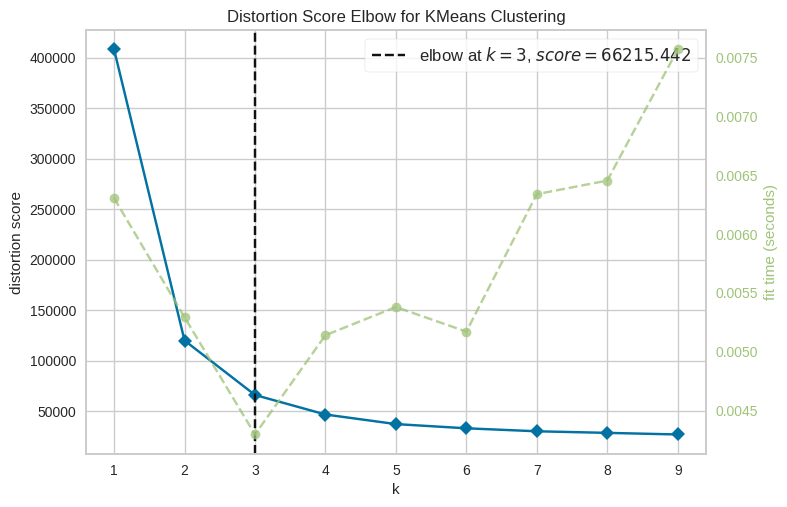

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1401]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df)
visualizer.show()

In [1402]:
# Menggunakan algoritma K-Means Clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# K-Means secara otomatis menghitung koordinat titik tengah dari setiap cluster
centroids = kmeans.cluster_centers_
# Kita akan menyimpan hasil perhitungan jarak ke dalam list bernama 'distances'
distances = []
for i, x in enumerate(df.drop('Cluster', axis=1).values):
    # Mengambil label cluster dari data ke-i
    cluster_id = kmeans.labels_[i]
    # Mengambil koordinat centroid sesuai dengan cluster data tersebut
    centroid = centroids[cluster_id]
    # Menghitung jarak Euclidean antara data ke-i dengan centroid-nya
    # np.linalg.norm() digunakan untuk menghitung panjang vektor (jarak Euclidean)
    distance = np.linalg.norm(x - centroid)
    # Menyimpan hasil perhitungan jarak ke dalam list 'distances'
    distances.append(distance)

# Misal threshold menggunakan persentil 95
threshold = np.mean(distances) + 2 * np.std(distances)
df['Anomaly'] = distances > threshold

df.head()

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.970546                1        36        0     1.419862   
1           0.268963                1        15        0     1.307715   
2          -0.586526                1        23        2    -1.439874   
3          -0.387294                1        33        2    -1.047361   
4          -0.972736                0         1        2     0.018031   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0            -0.548393      -0.204629       -0.000315   
1                   0             0.307960      -0.204629        2.218381   
2                   3            -0.905207      -0.204629       -1.024091   
3                   3            -1.347656      -0.204629        0.886694   
4                   3             1.121495      -0.204629        0.594263   

   TransactionDayOfWeek  TransactionAmount_Binned  Cluster  Anomaly  
0                   1.0                         1        2    False  
1                   1.0                         0        1    False  
2                   0.0                         2        0    False  
3                   4.0                         2        2    False  
4                   0.0                         1        1    False

Jalankan cell code ini untuk menyimpan model kamu.

In [1403]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [1404]:
# Menghitung dan menampilkan nilai Silhouette Score.
sil_score = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.4795209659896668


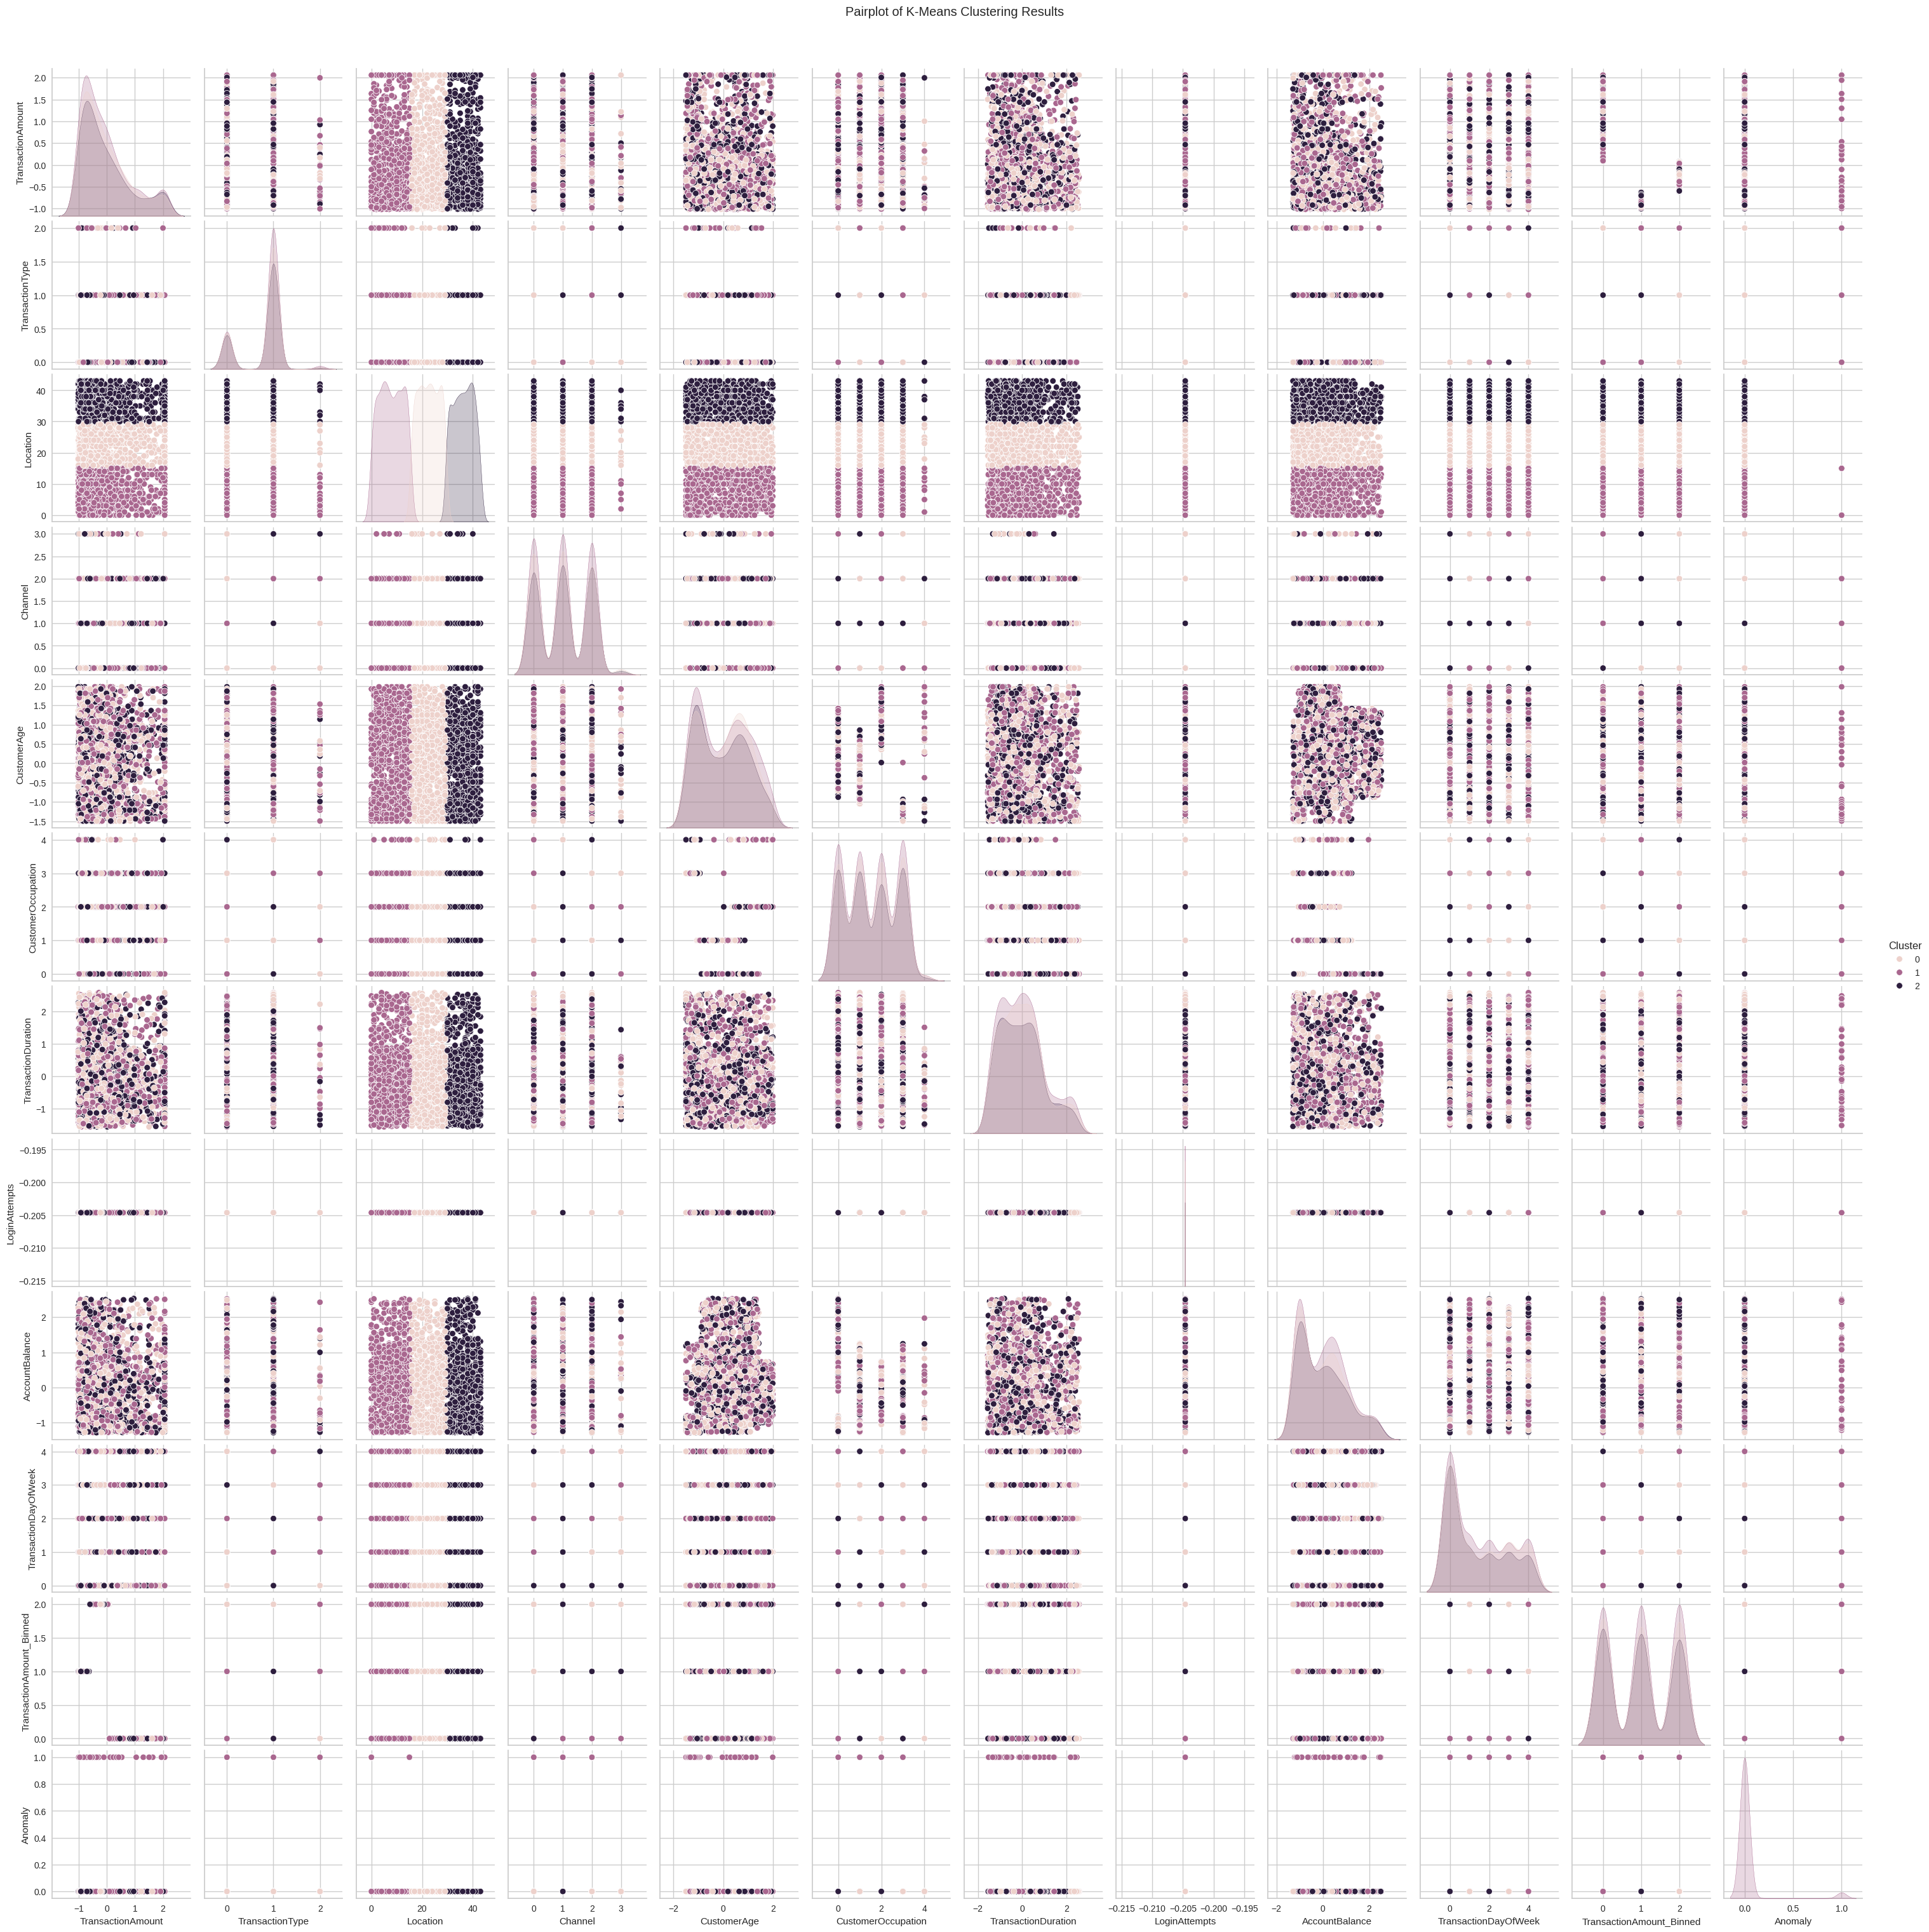

In [1405]:
# Membuat visualisasi hasil clustering
sns.pairplot(df, hue='Cluster', diag_kind='kde')
plt.suptitle('Pairplot of K-Means Clustering Results', y=1.02)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

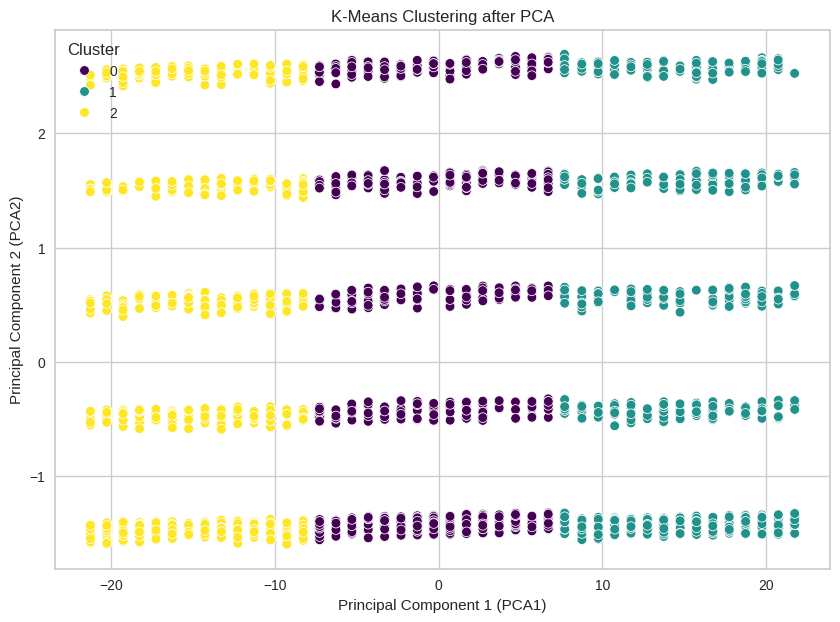

In [1406]:
# Membangun model menggunakan PCA
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
features = df.drop(columns=['Target', 'Anomaly'], errors='ignore') # Exclude target and anomaly columns if they exist

# Terapkan PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(features)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_data
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
# Membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10) # Use the same k as before
kmeans_pca.fit(pca_df)
pca_df['Cluster'] = kmeans_pca.labels_

# visualisasi
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', legend='full')
plt.title('K-Means Clustering after PCA')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.show()

In [1407]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**

### **Cluster 1 – Nasabah di Wilayah Non-Perkotaan Aktif, Transaksi Stabil dan Umur Relatif Muda**

**Karakteristik Rata-rata:**

* **TransactionAmount:** -0.05 → nominal transaksi berada di kisaran normal, tidak ekstrem.
* **TransactionType:** 0.78 → mayoritas menggunakan tipe transaksi utama (misalnya debit atau pembayaran rutin).
* **Location:** 22.57 → berasal dari **wilayah non-perkotaan yang cukup aktif secara ekonomi**.
* **Channel:** 1.00 → menggunakan **1–2 jenis kanal transaksi**, menandakan aktivitas digital moderat.
* **CustomerAge:** 0.01 → usia relatif muda.
* **CustomerOccupation:** 1.55 → pekerjaan **tingkat menengah**, seperti karyawan muda atau pekerja profesional.
* **TransactionDuration:** 0.01 → transaksi berlangsung cepat dan efisien.
* **LoginAttempts:** konstan di -0.20 → aktivitas login stabil, tidak berisiko.
* **AccountBalance:** -0.03 → saldo sedikit di bawah rata-rata.
* **TransactionAmount_Binned:** 0.99 → transaksi **berada pada kisaran menengah**.
* **TransactionDayOfWeek:** 1.49 → transaksi lebih sering dilakukan di **awal hingga pertengahan minggu**.

**Analisis:**
Nasabah dalam cluster ini cenderung **aktif secara digital**, dengan **transaksi rutin dalam jumlah sedang**. Mereka tinggal di wilayah non-perkotaan namun memiliki aktivitas ekonomi yang baik. Usia mereka tergolong muda, dengan kebiasaan transaksi yang wajar dan stabil.

**Rekomendasi:**
Tawarkan **produk digital banking praktis** seperti tabungan online, fitur transfer otomatis, atau e-wallet. Program loyalitas ringan seperti cashback transaksi rutin juga cocok untuk segmen ini.


### **Cluster 2 – Nasabah Perkotaan, Aktivitas Digital Stabil dan Seimbang**

**Karakteristik Rata-rata:**

* **TransactionAmount:** -0.06 → nominal transaksi normal.
* **TransactionType:** 0.81 → mayoritas transaksi reguler.
* **Location:** 7.70 → nasabah **berasal dari wilayah perkotaan atau padat penduduk**.
* **Channel:** 1.00 → menggunakan 1–2 kanal digital untuk transaksi.
* **CustomerAge:** 0.02 → usia muda hingga dewasa awal.
* **CustomerOccupation:** 1.53 → pekerjaan menengah seperti pegawai atau wirausaha.
* **TransactionDuration:** 0.01 → waktu transaksi efisien.
* **LoginAttempts:** -0.20 → login stabil dan aman.
* **AccountBalance:** 0.02 → saldo rata-rata **normal hingga sedikit di atas rata-rata**.
* **TransactionAmount_Binned:** 1.01 → transaksi **berada di kisaran menengah ke atas**.
* **TransactionDayOfWeek:** 1.47 → transaksi rutin di **awal minggu**.

**Analisis:**
Cluster ini menunjukkan **nasabah di wilayah perkotaan** dengan aktivitas transaksi digital yang **seimbang dan konsisten**. Mereka memiliki kebiasaan keuangan teratur, saldo yang cukup sehat, dan perilaku login yang aman.

**Rekomendasi:**
Fokus pada **layanan digital yang efisien** seperti aplikasi mobile banking, investasi ringan (reksa dana, deposito digital), dan promosi berbasis gaya hidup digital seperti diskon e-commerce atau QRIS cashback.


### **Cluster 3 – Nasabah di Wilayah Perkotaan Maju, Transaksi Normal, dan Sangat Stabil**

**Karakteristik Rata-rata:**

* **TransactionAmount:** -0.03 → nominal transaksi normal.
* **TransactionType:** 0.77 → mayoritas transaksi reguler.
* **Location:** 36.25 → berasal dari **wilayah perkotaan besar atau area dengan aktivitas ekonomi tinggi**.
* **Channel:** 1.04 → menggunakan **lebih banyak kanal digital**, aktif di berbagai platform.
* **CustomerAge:** -0.05 → usia cenderung muda.
* **CustomerOccupation:** 1.51 → pekerjaan menengah (profesional muda).
* **TransactionDuration:** -0.02 → transaksi cepat dan lancar.
* **LoginAttempts:** -0.20 → login konsisten dan aman.
* **AccountBalance:** 0.01 → saldo normal.
* **TransactionAmount_Binned:** 0.97 → transaksi **menengah**.
* **TransactionDayOfWeek:** 1.34 → transaksi sering di **awal hingga pertengahan minggu**.

**Analisis:**
Nasabah dalam cluster ini **tinggal di wilayah perkotaan besar** dengan **aktivitas digital tinggi**. Mereka terbiasa menggunakan berbagai kanal transaksi, memiliki perilaku keuangan yang stabil, dan tidak menunjukkan tanda-tanda anomali.

**Rekomendasi:**
Tawarkan **layanan digital premium** seperti personalisasi tampilan aplikasi, fitur reward otomatis, atau integrasi dengan platform gaya hidup (belanja online, transportasi, dan makanan).
Nasabah ini cocok untuk **program loyalitas eksklusif** atau kartu kredit entry-level berbasis transaksi digital.



In [1408]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
print("\nJumlah anomali per cluster:")
print(df.groupby('Cluster')['Anomaly'].sum())

def analyze_clusters(X, labels, k):
    print("\nAnalisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Memilih subset data berdasarkan label cluster
        cluster_data = X[labels == cluster_id]
        # Menampilkan identitas cluster yang sedang dianalisis
        print(f"\nCluster {cluster_id + 1}:")
        # Menampilkan statistik deskriptif: mean, min, dan max
        # describe() menghasilkan statistik umum (count, mean, std, min, max, dsb)
        # loc[['mean', 'min', 'max']] hanya mengambil tiga baris penting
        print(cluster_data.describe())

display(analyze_clusters(df.drop(['Cluster'], axis=1), df['Cluster'], 3))

df.isnull().sum()


Jumlah anomali per cluster:
Cluster
0     0
1    36
2     0
Name: Anomaly, dtype: int64

Analisis Karakteristik Setiap Cluster:

Cluster 1:
       TransactionAmount  TransactionType    Location     Channel  \
count         833.000000       833.000000  833.000000  833.000000   
mean           -0.052183         0.781513   22.572629    0.996399   
std             0.835897         0.436104    4.056372    0.838518   
min            -1.017881         0.000000   16.000000    0.000000   
25%            -0.734452         1.000000   19.000000    0.000000   
50%            -0.295362         1.000000   23.000000    1.000000   
75%             0.387831         1.000000   26.000000    2.000000   
max             2.059158         2.000000   29.000000    3.000000   

       CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
count   833.000000          833.000000           833.000000   8.330000e+02   
mean      0.012376            1.545018             0.010995  -2.046294e-01   
std

None

TransactionAmount           0
TransactionType             0
Location                    0
Channel                     0
CustomerAge                 0
CustomerOccupation          0
TransactionDuration         0
LoginAttempts               0
AccountBalance              0
TransactionDayOfWeek        0
TransactionAmount_Binned    0
Cluster                     0
Anomaly                     0
dtype: int64

## **Menjelaskan Karakteristik Tiap Cluster Berdasarkan Rentangnya**


### **1. Cluster 1: (Nasabah di Wilayah Non-Perkotaan Aktif, Transaksi Stabil dan Umur Relatif Muda)**

* **Rata-rata (mean) TransactionAmount:** -0.052 → setelah inverse: berada di kisaran normal (tidak terlalu rendah maupun tinggi).
* **Rentang TransactionAmount:** min -1.017, max 2.059 → setelah inverse: bervariasi dari transaksi kecil hingga besar.
* **Rata-rata (mean) Location:** 22.57 → setelah inverse: menunjukkan nasabah dari **wilayah non-perkotaan namun cukup aktif secara ekonomi** (misalnya kota kabupaten).
* **Rentang Location:** min 16, max 29 → menunjukkan persebaran di wilayah dengan aktivitas ekonomi menengah.
* **Rata-rata (mean) CustomerAge:** 0.01 → setelah inverse: tergolong **usia muda**.
* **Rentang CustomerAge:** min -1.49, max 1.98 → bervariasi dari muda hingga dewasa.
* **Rata-rata AccountBalance:** -0.025 → saldo sedikit di bawah rata-rata (normal).
* **Analisis:**
  Cluster ini berisi nasabah yang **aktif bertransaksi secara digital**, namun dalam jumlah yang relatif **stabil dan moderat**. Mereka tinggal di wilayah non-perkotaan yang cukup berkembang, memiliki **pekerjaan tingkat menengah**, dan usia rata-rata muda.
  Aktivitas transaksi menunjukkan **risiko rendah** serta pola perilaku keuangan yang konsisten.


### **2. Cluster 2: (Nasabah Perkotaan, Aktivitas Transaksi Stabil dan Seimbang)**

* **Rata-rata (mean) TransactionAmount:** -0.058 → setelah inverse: berada pada kisaran normal.
* **Rentang TransactionAmount:** min -1.017, max 2.059 → setelah inverse: dari transaksi kecil hingga besar.
* **Rata-rata (mean) Location:** 7.70 → setelah inverse: menunjukkan nasabah dari **wilayah perkotaan atau padat penduduk**.
* **Rentang Location:** min 0, max 15 → mayoritas dari area perkotaan dan sekitarnya.
* **Rata-rata (mean) CustomerAge:** 0.02 → setelah inverse: tergolong muda–dewasa awal.
* **Rentang CustomerAge:** min -1.49, max 1.98 → bervariasi dari muda hingga dewasa.
* **Rata-rata AccountBalance:** 0.019 → saldo normal hingga sedikit di atas rata-rata.
* **Analisis:**
  Cluster ini menggambarkan **nasabah yang tinggal di wilayah perkotaan**, dengan **aktivitas transaksi stabil dan seimbang**.
  Mereka memiliki kebiasaan keuangan yang baik, memanfaatkan kanal digital secara rutin, dan berisiko rendah terhadap aktivitas tidak wajar.
  Kelompok ini cocok untuk **program digital banking, investasi ringan, atau promosi gaya hidup digital**.



### **3. Cluster 3: (Nasabah di Wilayah Perkotaan Besar, Transaksi Normal dan Sangat Stabil)**

* **Rata-rata (mean) TransactionAmount:** -0.031 → setelah inverse: berada pada kisaran normal.
* **Rentang TransactionAmount:** min -1.013, max 2.059 → setelah inverse: transaksi bervariasi dari kecil hingga tinggi.
* **Rata-rata (mean) Location:** 36.25 → setelah inverse: menunjukkan nasabah dari **wilayah perkotaan besar atau pusat ekonomi utama**.
* **Rentang Location:** min 30, max 43 → mayoritas di kota besar dengan aktivitas ekonomi tinggi.
* **Rata-rata (mean) CustomerAge:** -0.049 → setelah inverse: tergolong muda.
* **Rentang CustomerAge:** min -1.49, max 1.98 → bervariasi dari muda hingga dewasa.
* **Rata-rata AccountBalance:** 0.005 → saldo normal.
* **Analisis:**
  Cluster ini terdiri dari nasabah di **kota besar yang sangat aktif secara digital**, dengan transaksi yang **stabil dan efisien**.
  Mereka umumnya **profesional muda** dengan perilaku keuangan teratur dan penggunaan berbagai kanal transaksi (mobile, online, ATM).
  Risiko anomali sangat rendah, dan kelompok ini potensial untuk **layanan digital premium atau reward berbasis aktivitas transaksi**.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [1409]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})
df.head()

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.970546                1        36        0     1.419862   
1           0.268963                1        15        0     1.307715   
2          -0.586526                1        23        2    -1.439874   
3          -0.387294                1        33        2    -1.047361   
4          -0.972736                0         1        2     0.018031   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0            -0.548393      -0.204629       -0.000315   
1                   0             0.307960      -0.204629        2.218381   
2                   3            -0.905207      -0.204629       -1.024091   
3                   3            -1.347656      -0.204629        0.886694   
4                   3             1.121495      -0.204629        0.594263   

   TransactionDayOfWeek  TransactionAmount_Binned  Target  Anomaly  
0                   1.0                         1       2    False  
1                   1.0                         0       1    False  
2                   0.0                         2       0    False  
3                   4.0                         2       2    False  
4                   0.0                         1       1    False

In [1410]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [1411]:
# Mengembalikan dataset ke rentang normal untuk fitur numerik setelah scaling.

# Mendefinisikan ulang kolom numerik asli yang sebelumnya diskalakan.
# Daftar kolom ini harus sesuai dengan kolom yang digunakan saat scaler (StandardScaler/MinMaxScaler) pertama kali dilatih.
original_numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Memastikan kolom-kolom ini ada dalam keadaan DataFrame saat ini sebelum melakukan transformasi invers.
numerical_cols_to_inverse = [col for col in original_numerical_cols if col in df.columns]

# Menerapkan transformasi invers (inverse transform) hanya pada kolom numerik yang relevan.
# Transformasi ini mengembalikan nilai yang diskalakan ke rentang nilai aslinya.
if numerical_cols_to_inverse:
    # Disarankan membuat salinan (copy) untuk menghindari peringatan SettingWithCopyWarning
    # jika df adalah 'view' dari DataFrame lain.
    df_subset_for_inverse = df[numerical_cols_to_inverse].copy()
    df[numerical_cols_to_inverse] = scaler.inverse_transform(df_subset_for_inverse)
else:
    # Menampilkan peringatan jika tidak ada kolom numerik asli yang ditemukan dalam DataFrame.
    print("Peringatan: Tidak ada kolom numerik asli yang ditemukan dalam DataFrame untuk transformasi invers.")

# Menampilkan 5 baris pertama dari DataFrame setelah transformasi invers.
df.head()

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09                1        36        0         70.0   
1             376.24                1        15        0         68.0   
2             126.29                1        23        2         19.0   
3             184.50                1        33        2         26.0   
4              13.45                0         1        2         45.0   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0                 81.0            1.0         5112.21   
1                   0                141.0            1.0        13758.91   
2                   3                 56.0            1.0         1122.35   
3                   3                 25.0            1.0         8569.06   
4                   3                198.0            1.0         7429.40   

   TransactionDayOfWeek  TransactionAmount_Binned  Target  Anomaly  
0                   1.0                         1       2    False  
1                   1.0                         0       1    False  
2                   0.0                         2       0    False  
3                   4.0                         2       2    False  
4                   0.0                         1       1    False

In [1412]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)

# 'encoders' harus berupa dictionary yang menyimpan encoder untuk tiap kolom kategorikal
if 'encoders' not in locals() or not isinstance(encoders, dict):
    print("Error: 'encoders' dictionary not found or not a dictionary. Silakan jalankan cell encoding terlebih dahulu (-UoGhAUrsxIV).")

else:
    # Daftar kolom kategorikal asli yang sebelumnya telah di-encode
    original_categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

    # Lakukan inverse transform untuk setiap kolom kategorikal
    for col in original_categorical_cols:
        # Pastikan kolom ada di dataframe dan memiliki encoder yang sesuai
        if col in df.columns and col in encoders:
            try:
                # Pastikan tipe data kolom adalah integer sebelum melakukan inverse_transform
                df[col] = encoders[col].inverse_transform(df[col].astype(int))

            # Jika terjadi error (misalnya terdapat label yang tidak dikenali)
            except ValueError as e:
                print(f"Error inverse transforming column '{col}': {e}")
                # Menampilkan nilai unik pada kolom yang menyebabkan error
                print(f"Unique values in '{col}' (encoded): {df[col].unique()}")
                # Menampilkan daftar kelas yang diketahui oleh encoder
                if col in encoders:
                    print(f"Classes known by encoder for '{col}': {encoders[col].classes_}")

        # Jika kolom ada di dataframe tetapi tidak ditemukan di dictionary encoder
        elif col in df.columns:
            print(f"Warning: Encoder untuk kolom '{col}' tidak ditemukan di dictionary 'encoders'.")

# Mengecek apakah kolom 'TransactionAmount_Binned' ada dalam dataframe
if 'TransactionAmount_Binned' in df.columns:
    # Mengecek apakah variabel 'le' (LabelEncoder khusus untuk binning) tersedia
    if 'le' in locals():
        try:
            # Lakukan inverse transform untuk mengembalikan label bin ke bentuk aslinya
            df['TransactionAmount_Binned'] = le.inverse_transform(df['TransactionAmount_Binned'])
        except ValueError as e:
            # Jika terdapat error (misalnya label tidak sesuai), tampilkan informasi detailnya
            print(f"Error inverse transforming column 'TransactionAmount_Binned': {e}")
            print(f"Unique values in 'TransactionAmount_Binned' (encoded): {df['TransactionAmount_Binned'].unique()}")
            if 'le' in locals():
                print(f"Classes known by encoder 'le': {le.classes_}")
    else:
        # Jika encoder 'le' belum dibuat, tampilkan peringatan untuk menjalankan cell sebelumnya
        print("Warning: LabelEncoder 'le' untuk 'TransactionAmount_Binned' tidak ditemukan. Jalankan cell binning terlebih dahulu (QjcR-3G0u-GL).")

# tampilkan dataset yang sudah di-inverse
df.head()


TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM         70.0   
1             376.24           Debit    Houston     ATM         68.0   
2             126.29           Debit       Mesa  Online         19.0   
3             184.50           Debit    Raleigh  Online         26.0   
4              13.45          Credit    Atlanta  Online         45.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
4            Student                198.0            1.0         7429.40   

   TransactionDayOfWeek TransactionAmount_Binned  Target  Anomaly  
0                   1.0                      Low       2    False  
1                   1.0                     High       1    False  
2                   0.0                   Medium       0    False  
3                   4.0                   Medium       2    False  
4                   0.0                      Low       1    False

In [1413]:
df.isnull().sum()

TransactionAmount            0
TransactionType             30
Location                    30
Channel                     27
CustomerAge                  0
CustomerOccupation          23
TransactionDuration          0
LoginAttempts                0
AccountBalance               0
TransactionDayOfWeek         0
TransactionAmount_Binned     0
Target                       0
Anomaly                      0
dtype: int64

In [1414]:
# Tentukan kolom numerik (tipe data angka) dari dataset yang sudah di-inverse
numerical_cols_inverse = df.select_dtypes(include=np.number).columns.tolist()

# Tentukan kolom kategorikal (tipe data objek/string) dari dataset yang sudah di-inverse
categorical_cols_inverse = df.select_dtypes(include='object').columns.tolist()

# Definisikan fungsi untuk melakukan analisis deskriptif data setelah inverse transform
def describe_inverse_data(df, numerical_cols, categorical_cols, target_col):
    # Menampilkan header analisis
    print("Analisis Deskriptif Data setelah Inverse Transform:")

    # Loop untuk setiap cluster berdasarkan nilai unik pada kolom target
    for cluster_id in sorted(df[target_col].unique()):
        # Ambil subset data untuk cluster tertentu
        cluster_data = df[df[target_col] == cluster_id]
        print(f"\nCluster {cluster_id}:")

        # Jika ada kolom numerik
        if numerical_cols:
            print("\nNumerical Features:")
            # Tampilkan statistik deskriptif seperti mean, min, max, std, dsb
            print(cluster_data[numerical_cols].describe())

        # Jika ada kolom kategorikal
        if categorical_cols:
            print("\nCategorical Features:")
            # Loop untuk setiap kolom kategorikal
            for col in categorical_cols:
                print(f"- {col}:")
                # Hitung dan tampilkan nilai modus (kategori yang paling sering muncul)
                display(cluster_data[col].mode().to_frame(name='mode'))

# Panggil fungsi untuk menampilkan analisis deskriptif berdasarkan cluster
# Parameter:
# - df: dataset yang sudah di-inverse
# - numerical_cols_inverse: daftar kolom numerik
# - categorical_cols_inverse: daftar kolom kategorikal
# - 'Target': kolom yang digunakan sebagai pembeda antar cluster
describe_inverse_data(df, numerical_cols_inverse, categorical_cols_inverse, 'Target')

# Cek jumlah nilai kosong (missing values) di setiap kolom setelah inverse transform
df.isnull().sum()


Analisis Deskriptif Data setelah Inverse Transform:

Cluster 0:

Numerical Features:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         833.000000   833.000000           833.000000          833.0   
mean          282.409946    44.899160           120.193277            1.0   
std           244.225848    17.427926            68.984999            0.0   
min             0.260000    18.000000            10.000000            1.0   
25%            83.070000    28.000000            66.000000            1.0   
50%           211.360000    46.000000           112.000000            1.0   
75%           410.970000    59.000000           161.000000            1.0   
max           899.285000    80.000000           300.000000            1.0   

       AccountBalance  TransactionDayOfWeek  Target  
count      833.000000            833.000000   833.0  
mean      5015.053193              1.489796     0.0  
std       3865.684164              1.540387     0.0  
min  

mode
0  Debit

- Location:


mode
0  Los Angeles

- Channel:


mode
0  Branch

- CustomerOccupation:


mode
0  Student

- TransactionAmount_Binned:


mode
0  High


Cluster 1:

Numerical Features:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         919.000000   919.000000           919.000000          919.0   
mean          280.611317    45.071817           120.297062            1.0   
std           248.544244    18.168578            70.881886            0.0   
min             0.320000    18.000000            10.000000            1.0   
25%            79.615000    27.000000            63.000000            1.0   
50%           212.140000    45.000000           113.000000            1.0   
75%           391.565000    60.000000           161.500000            1.0   
max           899.285000    80.000000           300.000000            1.0   

       AccountBalance  TransactionDayOfWeek  Target  
count      919.000000            919.000000   919.0  
mean      5188.657922              1.468988     1.0  
std       3835.593431              1.506293     0.0  
min        117.980000              0.000000     1.0  
25%

mode
0  Debit

- Location:


mode
0  Fort Worth

- Channel:


mode
0  Branch

- CustomerOccupation:


mode
0  Student

- TransactionAmount_Binned:


mode
0  Medium


Cluster 2:

Numerical Features:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         761.000000   761.000000           761.000000          761.0   
mean          288.590894    43.804205           117.733246            1.0   
std           256.943111    17.554795            68.947585            0.0   
min             1.410000    18.000000            10.000000            1.0   
25%            85.350000    27.000000            61.000000            1.0   
50%           206.460000    42.000000           111.000000            1.0   
75%           421.560000    58.000000           160.000000            1.0   
max           899.285000    80.000000           296.000000            1.0   

       AccountBalance  TransactionDayOfWeek  Target  
count      761.000000            761.000000   761.0  
mean      5132.956452              1.339028     2.0  
std       3944.947051              1.483475     0.0  
min        101.250000              0.000000     2.0  
25%

mode
0  Debit

- Location:


mode
0  Philadelphia
1        Tucson

- Channel:


mode
0  Branch

- CustomerOccupation:


mode
0  Student

- TransactionAmount_Binned:


mode
0  High

TransactionAmount            0
TransactionType             30
Location                    30
Channel                     27
CustomerAge                  0
CustomerOccupation          23
TransactionDuration          0
LoginAttempts                0
AccountBalance               0
TransactionDayOfWeek         0
TransactionAmount_Binned     0
Target                       0
Anomaly                      0
dtype: int64

## Menjelaskan Karakteristik Tiap Cluster Berdasarkan Rentangnya Setelah Inverse

### **1. Cluster 0: (Nasabah Transaksi Menengah, Saldo Normal, Lokasi Los Angeles)**

* **Rata-rata (mean) TransactionAmount:** 282.41 USD
* **Rata-rata (mean) CustomerAge:** 44.90 tahun
* **Rata-rata (mean) TransactionDuration:** 120.19 menit
* **Rata-rata (mean) AccountBalance:** 5015.05 USD
* **Rata-rata (mean) TransactionDayOfWeek:** 1.49 → umumnya pada hari Senin–Selasa
* **Mode Categorical:**

  * **TransactionType:** Debit
  * **Location:** Los Angeles
  * **Channel:** Branch
  * **CustomerOccupation:** Student
  * **TransactionAmount_Binned:** High

**Analisis:**
Cluster ini berisi **nasabah dengan aktivitas transaksi menengah hingga tinggi** dan **saldo rekening yang normal**. Usia rata-rata nasabah sekitar **45 tahun**, menandakan kelompok **dewasa produktif**.
Mereka **sering bertransaksi di cabang bank (Branch)** dan mayoritas memiliki **pekerjaan sebagai pelajar (Student)**, meskipun dari lokasi perkotaan seperti **Los Angeles**.
Frekuensi transaksi cukup tinggi, dengan rentang nominal **0.26 – 899 USD**, menunjukkan aktivitas finansial aktif namun tetap stabil.


### **2. Cluster 1: (Nasabah Transaksi Menengah, Saldo Normal, Lokasi Fort Worth)**

* **Rata-rata (mean) TransactionAmount:** 280.61 USD
* **Rata-rata (mean) CustomerAge:** 45.07 tahun
* **Rata-rata (mean) TransactionDuration:** 120.30 menit
* **Rata-rata (mean) AccountBalance:** 5188.66 USD
* **Rata-rata (mean) TransactionDayOfWeek:** 1.47 → umumnya pada hari Senin–Selasa
* **Mode Categorical:**

  * **TransactionType:** Debit
  * **Location:** Fort Worth
  * **Channel:** Branch
  * **CustomerOccupation:** Student
  * **TransactionAmount_Binned:** Medium

**Analisis:**
Cluster ini mewakili **nasabah dengan transaksi menengah dan saldo rekening yang sedikit lebih tinggi** dari Cluster 0.
Rata-rata usia sekitar **45 tahun**, dan mereka **sering melakukan transaksi di cabang bank (Branch)** dengan **durasi transaksi rata-rata 120 menit**.
Sebagian besar nasabah berasal dari **kawasan perkotaan (Fort Worth)** dan berprofesi sebagai **Student**, dengan aktivitas transaksi cenderung **stabil dan rutin** di kisaran **79 – 776 USD**.


### **3. Cluster 2: (Nasabah Transaksi Menengah-Tinggi, Saldo Normal, Lokasi Philadelphia dan Tucson)**

* **Rata-rata (mean) TransactionAmount:** 288.59 USD
* **Rata-rata (mean) CustomerAge:** 43.80 tahun
* **Rata-rata (mean) TransactionDuration:** 117.73 menit
* **Rata-rata (mean) AccountBalance:** 5132.96 USD
* **Rata-rata (mean) TransactionDayOfWeek:** 1.34 → umumnya pada hari Senin
* **Mode Categorical:**

  * **TransactionType:** Debit
  * **Location:** Philadelphia, Tucson
  * **Channel:** Branch
  * **CustomerOccupation:** Student
  * **TransactionAmount_Binned:** High

**Analisis:**
Cluster ini terdiri dari **nasabah dengan nominal transaksi relatif tinggi** dan **saldo rekening normal**.
Usia rata-rata lebih muda (sekitar **43 tahun**), menunjukkan **kelompok nasabah aktif secara digital dan rutin bertransaksi**.
Sebagian besar berdomisili di **kota besar seperti Philadelphia dan Tucson**, menggunakan kanal **Branch**, dan berprofesi sebagai **Student**.
Rentang nominal transaksi luas (**1.41 – 899 USD**) dengan **durasi transaksi sedikit lebih cepat**, menandakan efisiensi dan aktivitas finansial yang cukup tinggi.



(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [1415]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# Pastikan cluster_labels panjangnya sama dengan jumlah baris df
# Gunakan label dari model K-Means yang sudah dilatih
cluster_labels = pd.Series(kmeans.labels_, name='Target')

# Gabungkan dengan df yang sudah di-inverse.
# Pastikan untuk tidak membuat kolom 'Cluster' baru jika 'Target' sudah ada.
if 'Target' in df.columns:
    df_final = df.copy()
    df_final['Target'] = cluster_labels.values # Replace the existing Target column
else:
    df_final = pd.concat([df.reset_index(drop=True), cluster_labels.reset_index(drop=True)], axis=1)


# Tampilkan 5 baris pertama
df_final.head()

TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM         70.0   
1             376.24           Debit    Houston     ATM         68.0   
2             126.29           Debit       Mesa  Online         19.0   
3             184.50           Debit    Raleigh  Online         26.0   
4              13.45          Credit    Atlanta  Online         45.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
4            Student                198.0            1.0         7429.40   

   TransactionDayOfWeek TransactionAmount_Binned  Target  Anomaly  
0                   1.0                      Low       2    False  
1                   1.0                     High       1    False  
2                   0.0                   Medium       0    False  
3                   4.0                   Medium       2    False  
4                   0.0                      Low       1    False

In [1416]:
# Simpan Data
df_final.to_csv('data_clustering_inverse.csv', index=False)

End of Code.